In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import dask.array as da
import xarray as xr
import os


from xmitgcm import open_mdsdataset
import xmitgcm
import ecco_v4_py as ecco


from netCDF4 import Dataset

import seawater

from analysis_package import plotting_functions
from analysis_package import open_datasets
from analysis_package import derive_potential_density_values_TEST
from analysis_package import ecco_masks

from importlib import reload

# reload modules for prototyping...
ecco_masks = reload(ecco_masks)
plotting_functions = reload(plotting_functions)
open_datasets = reload(open_datasets)
derive_potential_density_values_TEST = reload(derive_potential_density_values_TEST)


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
RHO_SW = 1023.6 # kg/m^3, Density of sea water at 1 atm, 25deg C, 35 g/kg psu
RHO_FW = 997.05 # kg/m^3, Density of fresh water at 25deg C (http://butane.chem.uiuc.edu/pshapley/GenChem1/L21/2.html)
So = 35. # g/kg, Reference salinity psu

In [2]:
######################################################################################################################
################################################### LOAD GRID ########################################################
######################################################################################################################
grid_path = "./ecco_grid/ECCOv4r3_grid.nc"
grid = xr.open_dataset(grid_path)
cds = grid.coords.to_dataset()
grid_xmitgcm = ecco.ecco_utils.get_llc_grid(cds)

######################################################################################################################
############################################# CREATE DOMAIN MASKS ####################################################
######################################################################################################################
maskW = xr.open_dataarray("generic_masks/maskW.nc")
maskS = xr.open_dataarray("generic_masks/maskS.nc")
maskC = xr.open_dataarray("generic_masks/maskC.nc")

southern_ocean_mask_W, southern_ocean_mask_S, so_atl_basin_mask_W, so_atl_basin_mask_S, so_indpac_basin_mask_W, so_indpac_basin_mask_S = ecco_masks.get_basin_masks(maskW, maskS, maskC)


In [16]:
data_dir = "./nctiles_monthly/"
time_slice = np.arange(0,288)

#oceFWflx = open_datasets.open_combine_raw_ECCO_tile_files(data_dir,"oceFWflx",time_slice,rename_indices=True)
#oceQnet = open_datasets.open_combine_raw_ECCO_tile_files(data_dir,"oceQnet",time_slice,rename_indices=True)
#SALT = open_datasets.open_combine_raw_ECCO_tile_files(data_dir,"SALT",time_slice,rename_indices=True).isel(k=0)
#P_INSITU = open_datasets.open_combine_raw_ECCO_tile_files(data_dir,"P_INSITU",time_slice,rename_indices=False).isel(k=0)
#T_INSITU = open_datasets.open_combine_raw_ECCO_tile_files(data_dir,"T_INSITU",time_slice,rename_indices=False).isel(k=0)

PDENS_U = open_datasets.open_combine_raw_ECCO_tile_files(data_dir,"PDENS_U",time_slice,rename_indices=False).isel(k=0)
PDENS_V = open_datasets.open_combine_raw_ECCO_tile_files(data_dir,"PDENS_V",time_slice,rename_indices=False).isel(k=0)

PDENS = open_datasets.open_combine_raw_ECCO_tile_files(data_dir,"PDENS",time_slice,rename_indices=False).isel(k=0)

surface_alpha = xr.open_dataset("./analysis_datasets/surface_alpha.nc").rename({"oceQnet":"alpha"})
print(surface_alpha)
surface_beta = xr.open_dataset("./analysis_datasets/surface_beta.nc").rename({"oceQnet":"beta"})
print(surface_beta)
surface_heat_capacity = xr.open_dataset("./analysis_datasets/surface_heat_capacity.nc").rename({"oceQnet":"cp"})
print(surface_heat_capacity)
"""
Flux_Surface = ((-surface_alpha.alpha/surface_heat_capacity.cp)*oceQnet.oceQnet - (RHO_SW*So/RHO_SW)*surface_beta.beta*oceFWflx.oceFWflx).copy(deep=True)
Flux_Surface_Southern = Flux_Surface.copy(deep=True)
Flux_Surface_Southern.loc[{"tile":2}] = Flux_Surface.isel(tile=2)*np.nan
Flux_Surface_Southern.loc[{"tile":5}] = Flux_Surface.isel(tile=5)*np.nan
Flux_Surface_Southern.loc[{"tile":6}] = Flux_Surface.isel(tile=6)*np.nan
Flux_Surface_Southern.loc[{"tile":7}] = Flux_Surface.isel(tile=7)*np.nan
Flux_Surface_Southern.loc[{"tile":10}] = Flux_Surface.isel(tile=10)*np.nan

Flux_Surface_Northern = Flux_Surface.copy(deep=True)
Flux_Surface_Northern.loc[{"tile":0}] = Flux_Surface.isel(tile=0)*np.nan
Flux_Surface_Northern.loc[{"tile":1}] = Flux_Surface.isel(tile=1)*np.nan
Flux_Surface_Northern.loc[{"tile":3}] = Flux_Surface.isel(tile=3)*np.nan
Flux_Surface_Northern.loc[{"tile":4}] = Flux_Surface.isel(tile=4)*np.nan
Flux_Surface_Northern.loc[{"tile":8}] = Flux_Surface.isel(tile=8)*np.nan
Flux_Surface_Northern.loc[{"tile":9}] = Flux_Surface.isel(tile=9)*np.nan
Flux_Surface_Northern.loc[{"tile":11}] = Flux_Surface.isel(tile=11)*np.nan
Flux_Surface_Northern.loc[{"tile":12}] = Flux_Surface.isel(tile=12)*np.nan
"""

Loaded PDENS_U over time slice  

Loaded PDENS_V over time slice  

Loaded PDENS over time slice  

<xarray.Dataset>
Dimensions:  (i: 90, j: 90, tile: 13, time: 288)
Coordinates:
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 ... 285.0 286.0 287.0 288.0
  * j        (j) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i        (i) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
    tim      (time) datetime64[ns] ...
    lon      (tile, j, i) float64 ...
    lat      (tile, j, i) float64 ...
Dimensions without coordinates: tile
Data variables:
    alpha    (tile, time, j, i) float64 ...
<xarray.Dataset>
Dimensions:  (i: 90, j: 90, tile: 13, time: 288)
Coordinates:
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 ... 285.0 286.0 287.0 288.0
  * j        (j) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i        (i) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
    tim      (time) datetime64[ns] ...
    lon      (tile, j, i) f

'\nFlux_Surface = ((-surface_alpha.alpha/surface_heat_capacity.cp)*oceQnet.oceQnet - (RHO_SW*So/RHO_SW)*surface_beta.beta*oceFWflx.oceFWflx).copy(deep=True)\nFlux_Surface_Southern = Flux_Surface.copy(deep=True)\nFlux_Surface_Southern.loc[{"tile":2}] = Flux_Surface.isel(tile=2)*np.nan\nFlux_Surface_Southern.loc[{"tile":5}] = Flux_Surface.isel(tile=5)*np.nan\nFlux_Surface_Southern.loc[{"tile":6}] = Flux_Surface.isel(tile=6)*np.nan\nFlux_Surface_Southern.loc[{"tile":7}] = Flux_Surface.isel(tile=7)*np.nan\nFlux_Surface_Southern.loc[{"tile":10}] = Flux_Surface.isel(tile=10)*np.nan\n\nFlux_Surface_Northern = Flux_Surface.copy(deep=True)\nFlux_Surface_Northern.loc[{"tile":0}] = Flux_Surface.isel(tile=0)*np.nan\nFlux_Surface_Northern.loc[{"tile":1}] = Flux_Surface.isel(tile=1)*np.nan\nFlux_Surface_Northern.loc[{"tile":3}] = Flux_Surface.isel(tile=3)*np.nan\nFlux_Surface_Northern.loc[{"tile":4}] = Flux_Surface.isel(tile=4)*np.nan\nFlux_Surface_Northern.loc[{"tile":8}] = Flux_Surface.isel(tile=8

In [17]:
Flux_Surface_Southern = xr.open_dataarray("./analysis_datasets/Flux_Surface_Southern.nc")
print(Flux_Surface_Southern)
Flux_Surface_Northern = xr.open_dataarray("./analysis_datasets/Flux_Surface_Northern.nc")
print(Flux_Surface_Northern)

<xarray.DataArray (tile: 13, time: 288, j: 90, i: 90)>
[30326400 values with dtype=float64]
Coordinates:
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 ... 285.0 286.0 287.0 288.0
  * j        (j) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i        (i) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
    tim      (time) datetime64[ns] ...
    lon      (tile, j, i) float64 ...
    lat      (tile, j, i) float64 ...
Dimensions without coordinates: tile
<xarray.DataArray (tile: 13, time: 288, j: 90, i: 90)>
[30326400 values with dtype=float64]
Coordinates:
  * time     (time) float64 1.0 2.0 3.0 4.0 5.0 ... 285.0 286.0 287.0 288.0
  * j        (j) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i        (i) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
    tim      (time) datetime64[ns] ...
    lon      (tile, j, i) float64 ...
    lat      (tile, j, i) float64 ...
Dimensions without coordinates: tile


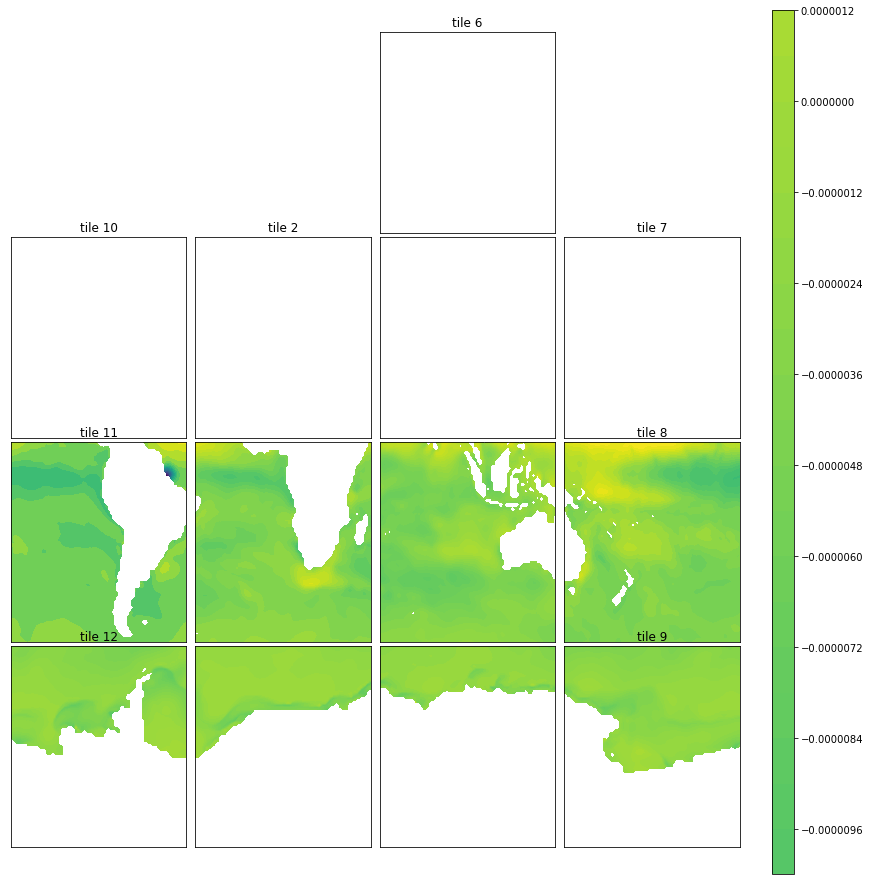

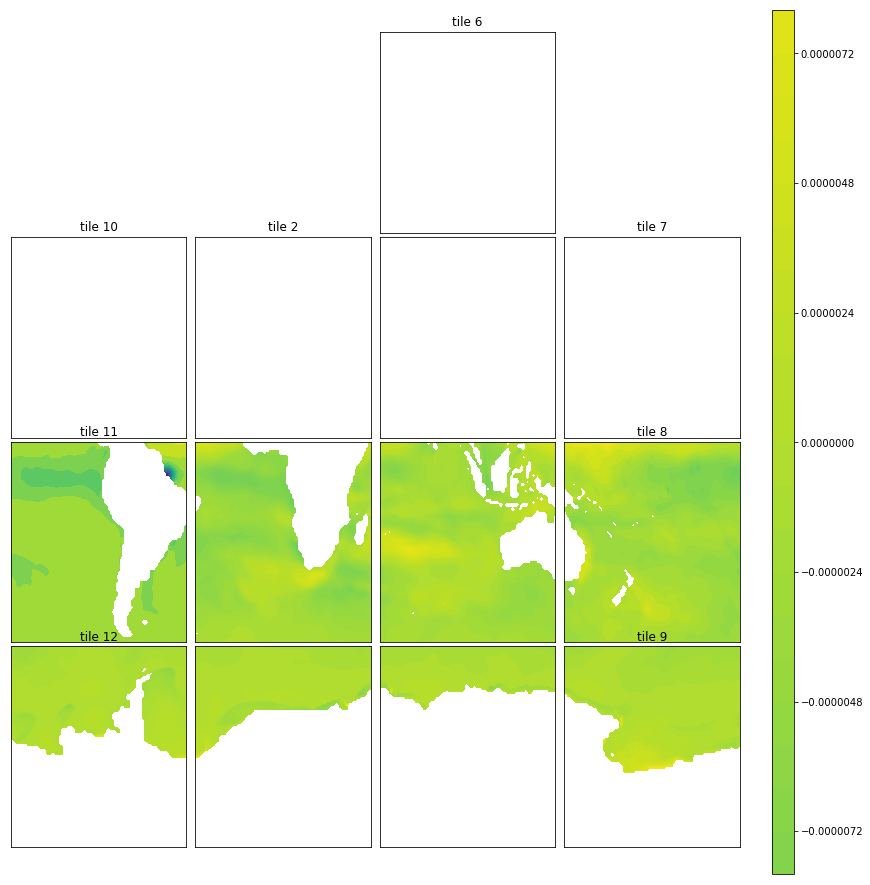

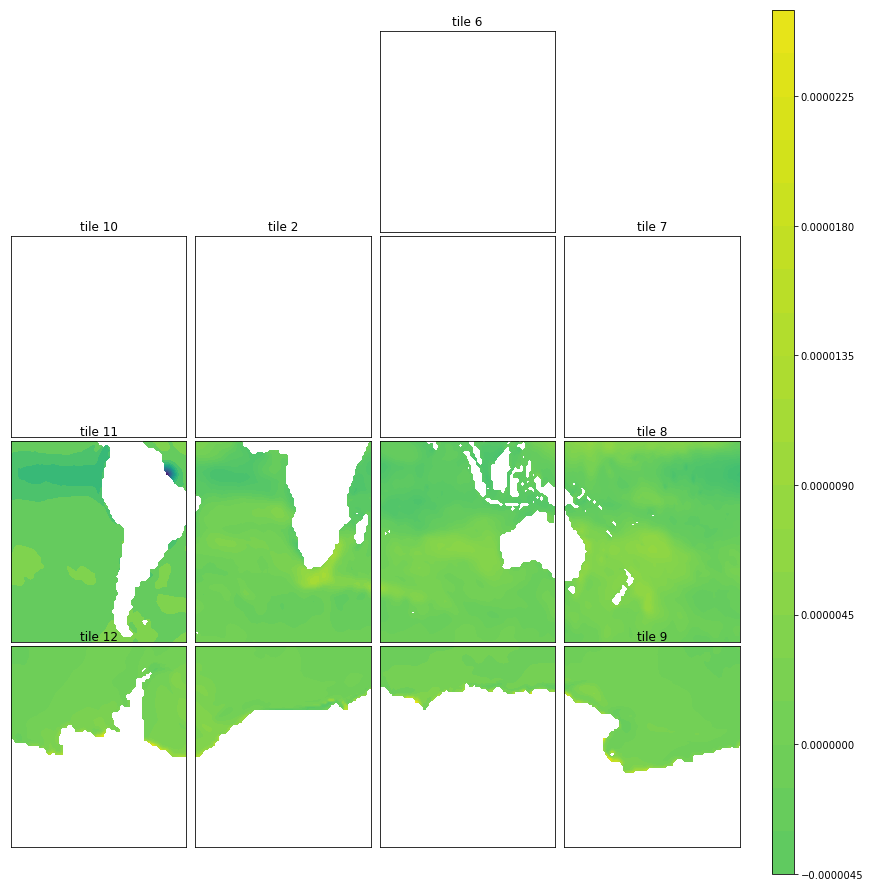

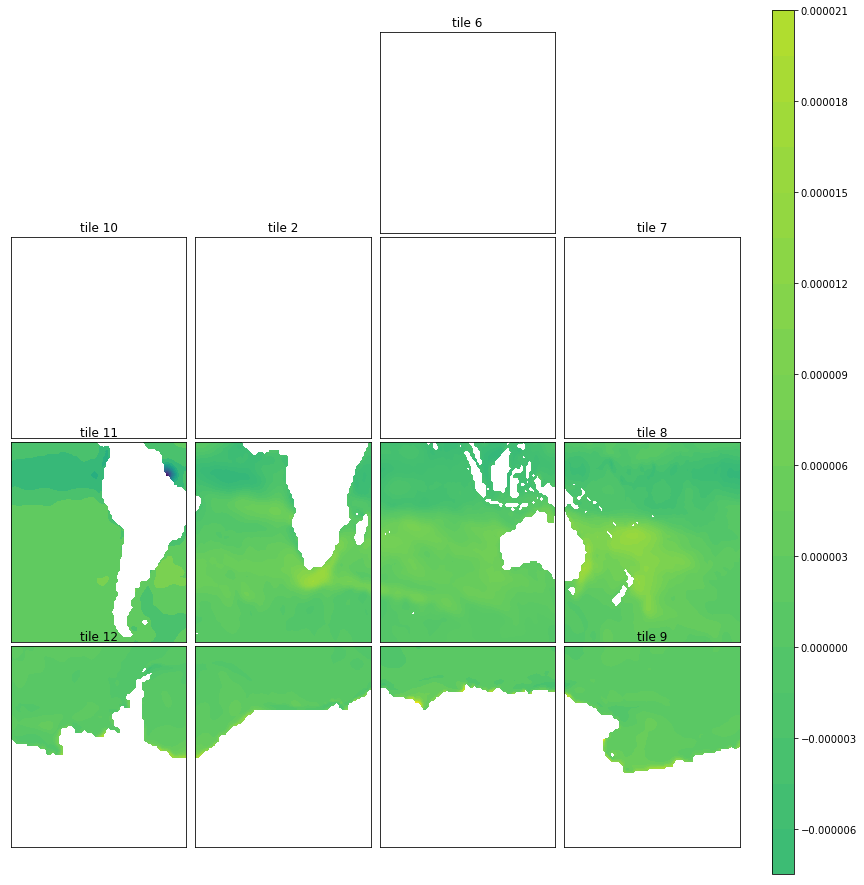

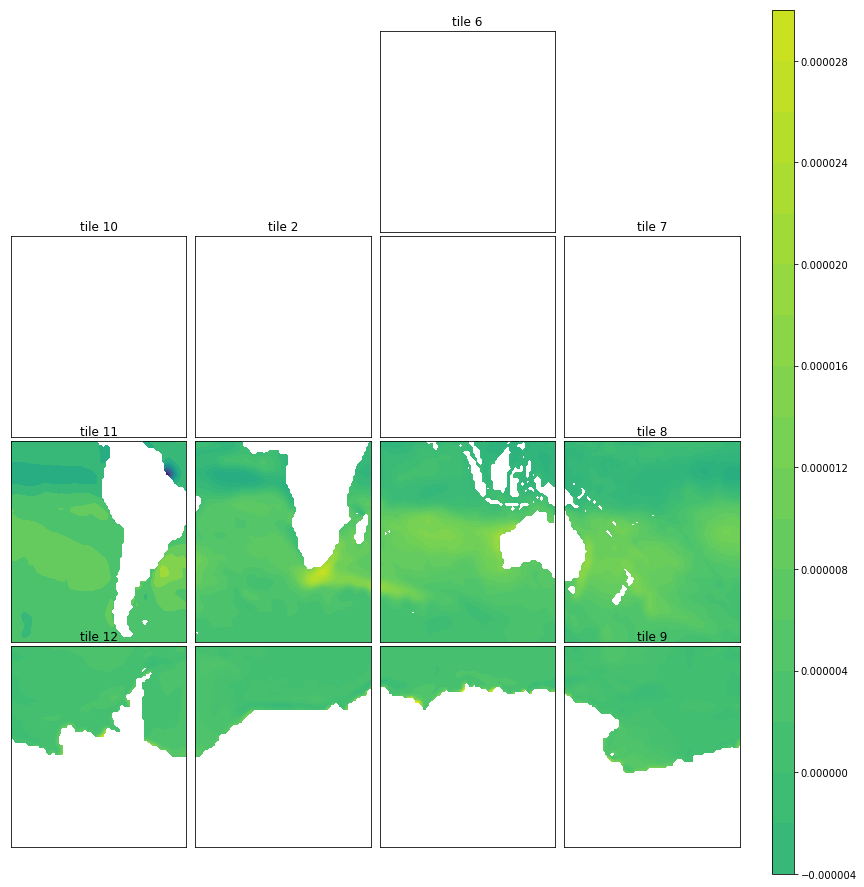

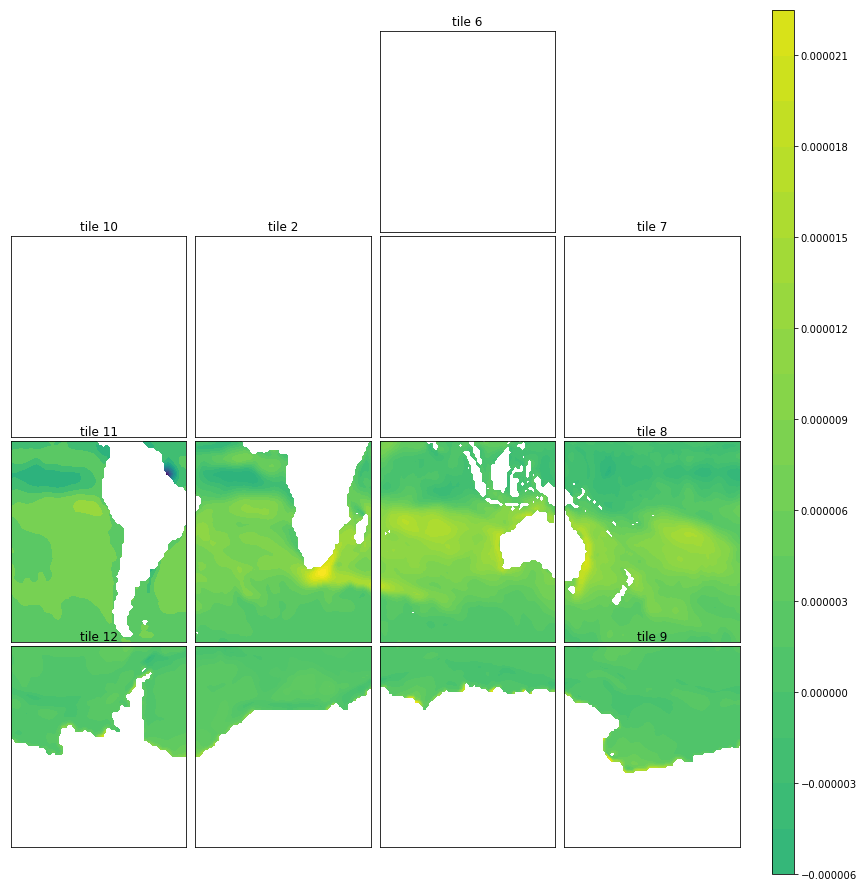

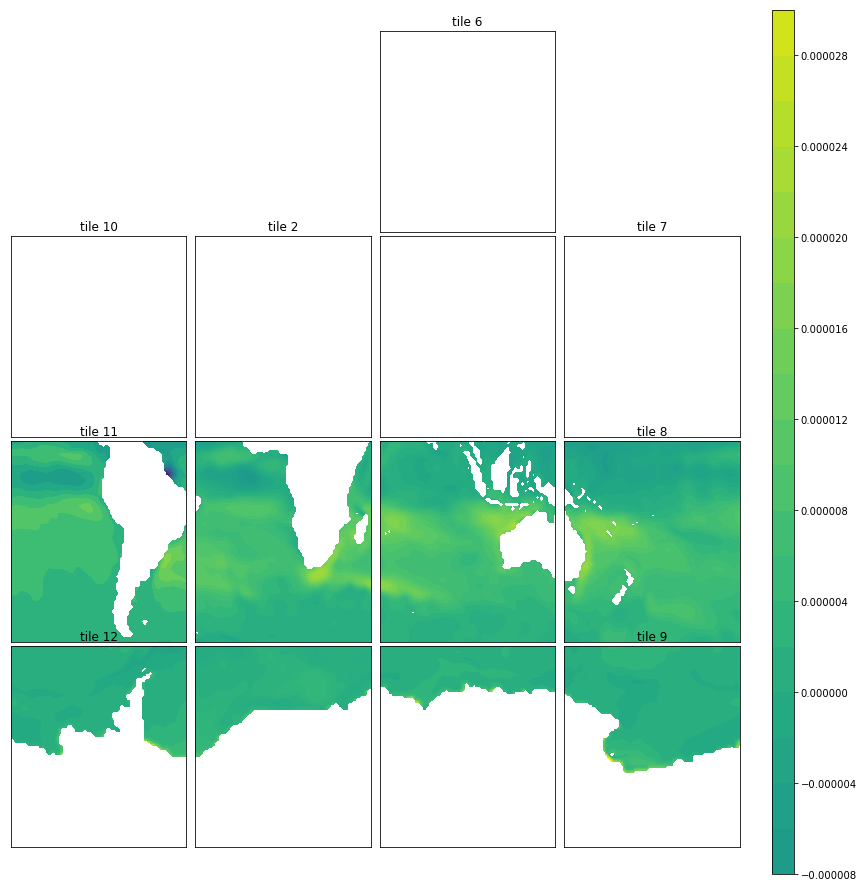

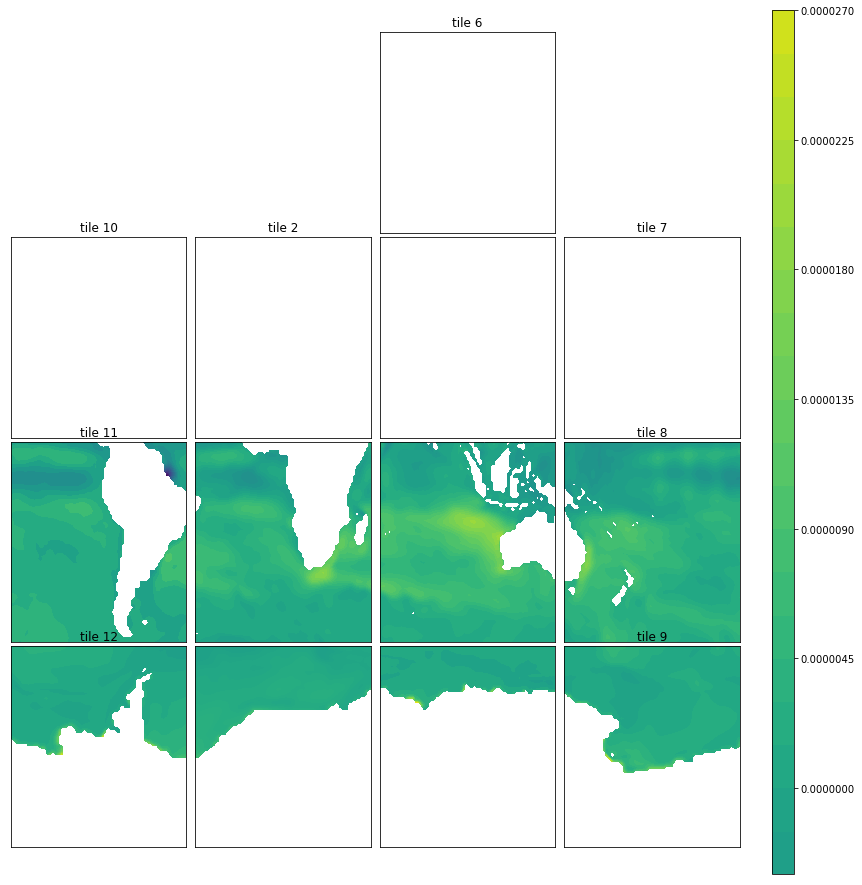

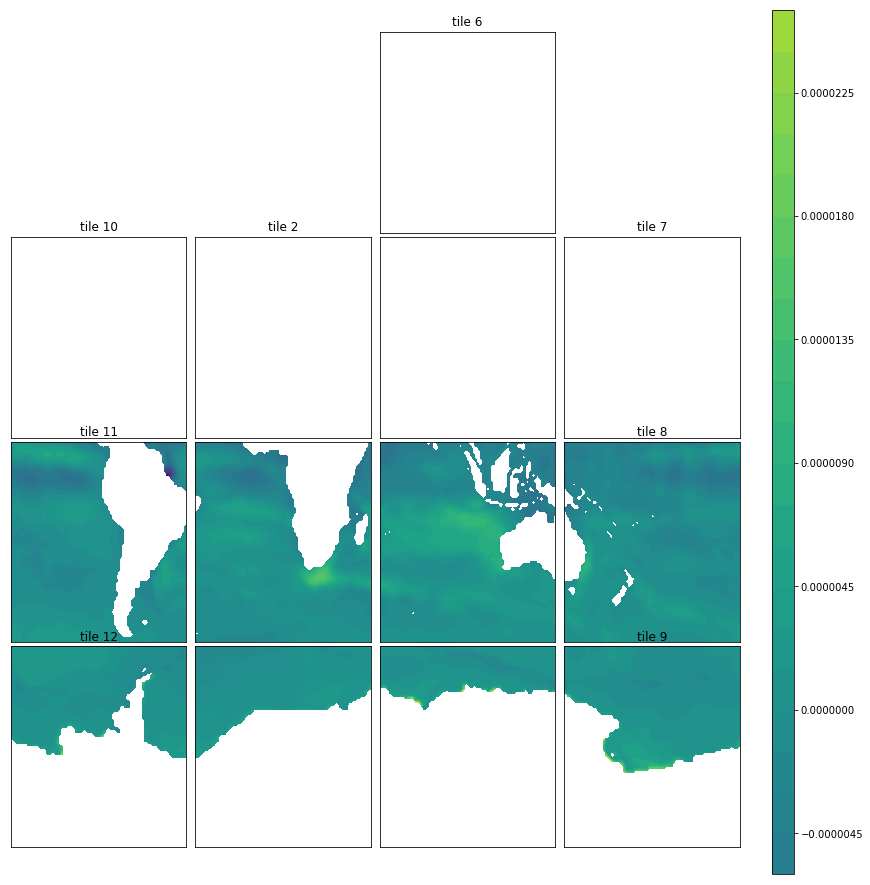

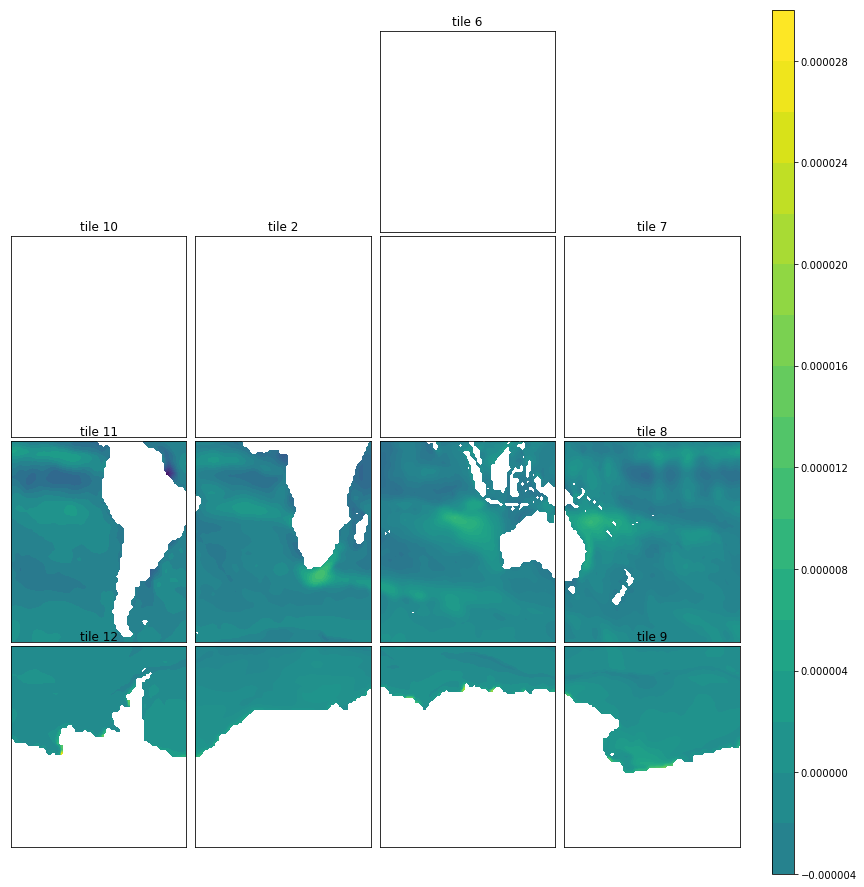

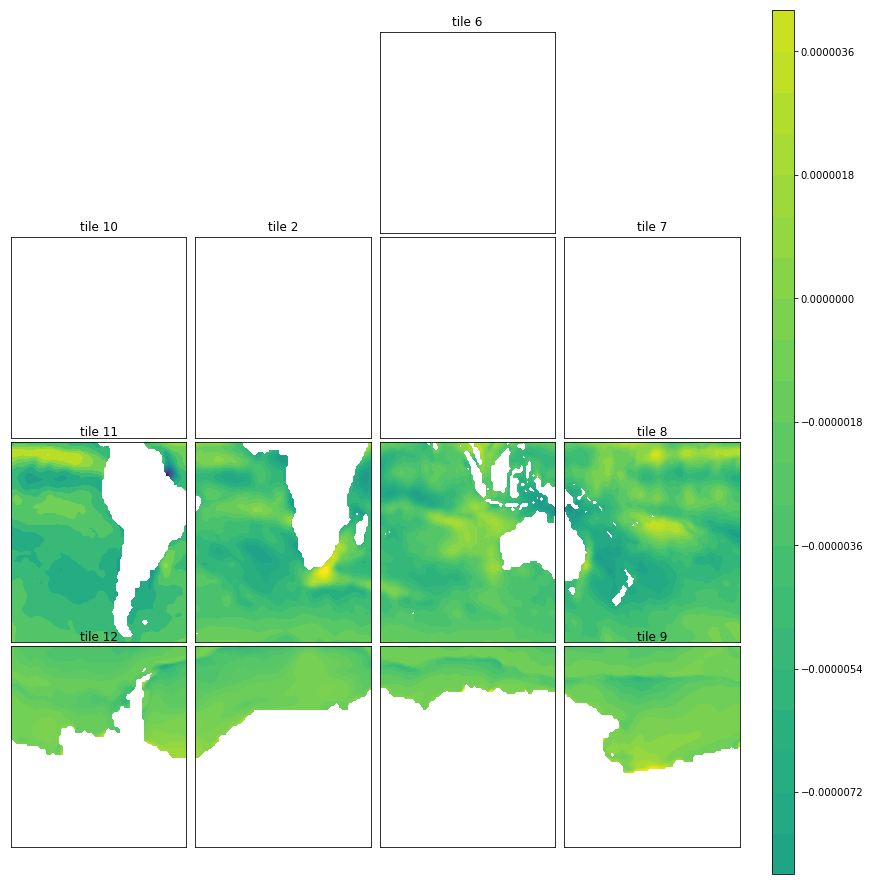

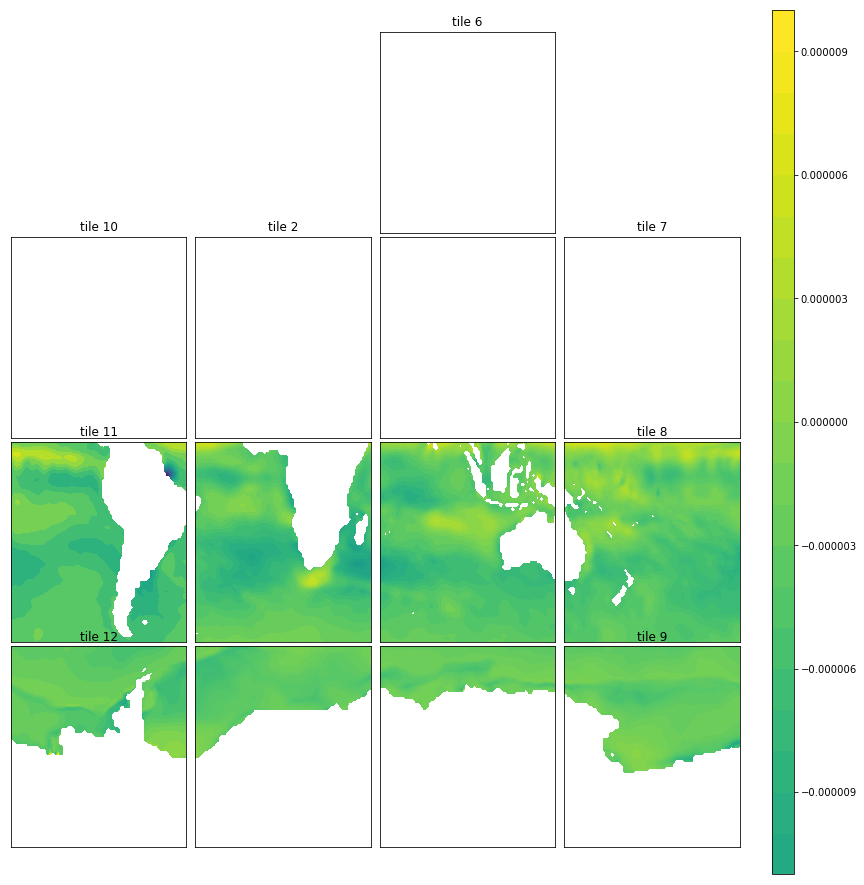

In [24]:
for i in range(0,12):
    plt = plotting_functions.world_plot(Flux_Surface_Southern.isel(time=i))
    plt.show()
    plt.close()

In [19]:
######################################################################################################################
########################################## Integrate Horizontally ####################################################
######################################################################################################################

time_slice = np.arange(1,289)

pot_dens_coord = np.arange(1028.0,1033.9,0.2)
pot_dens_coord = np.concatenate((np.asarray([1000.]),pot_dens_coord, np.arange(1034.0,1036,0.1), np.arange(1036.0,1038,0.02)))


# set dimensions based on input dataset with modified vertical level spacing..
F_int_dims = (len(time_slice),
              len(pot_dens_coord)
             )

empty_F_int_data = np.zeros(F_int_dims)
# trying to make this as general as possible, but need to keep an eye on this..
new_coords = [time_slice, 
              pot_dens_coord, 
              ]
new_dims = ["time", 
            "pot_rho", 
            ]

F_int_dataarray = xr.DataArray(data=empty_F_int_data,coords=new_coords,dims=new_dims)
F_int_dataarray.load()

# calculate integral of surface flux over time period..
for density in pot_dens_coord:
    F_int_dataarray.loc[{"pot_rho":density}]=(Flux_Surface_Southern*PDENS.PDENS.where(PDENS.PDENS > density)*grid.rA).sum(dim=["i","j","tile"])
    print("Done "+str(density)+" surface")
    


Done 1000.0 surface
Done 1028.0 surface
Done 1028.2 surface
Done 1028.4 surface
Done 1028.6 surface
Done 1028.8 surface
Done 1029.0 surface
Done 1029.2 surface
Done 1029.4 surface
Done 1029.6 surface
Done 1029.8 surface
Done 1030.0 surface
Done 1030.2 surface
Done 1030.4 surface
Done 1030.6 surface
Done 1030.8 surface
Done 1031.0 surface
Done 1031.2 surface
Done 1031.4 surface
Done 1031.6 surface
Done 1031.8 surface
Done 1032.0 surface
Done 1032.2 surface
Done 1032.4 surface
Done 1032.6 surface
Done 1032.8 surface
Done 1033.0 surface
Done 1033.2 surface
Done 1033.4 surface
Done 1033.6 surface
Done 1033.8 surface
Done 1034.0 surface
Done 1034.1 surface
Done 1034.2 surface
Done 1034.3 surface
Done 1034.4 surface
Done 1034.5 surface
Done 1034.6 surface
Done 1034.7 surface
Done 1034.8 surface
Done 1034.9 surface
Done 1035.0 surface
Done 1035.1 surface
Done 1035.2 surface
Done 1035.3 surface
Done 1035.4 surface
Done 1035.5 surface
Done 1035.6 surface
Done 1035.7 surface
Done 1035.8 surface


In [20]:
######################################################################################################################
#################################### DERIVE LATITUDINAL DENSITY MINIMA ###############################################
######################################################################################################################
time_slice = np.arange(0,288)

lat_vals = np.arange(-88,1)

# set dimensions based on input dataset with modified vertical level spacing..
dens_minima_dims = (len(time_slice),
                    len(lat_vals))

empty_dens_minima_data = np.zeros(dens_minima_dims)
# trying to make this as general as possible, but need to keep an eye on this..
new_coords = [time_slice, 
              lat_vals]
new_dims = ["time",  
            "lat"]

dens_minima_dataarray = xr.DataArray(data=empty_dens_minima_data,coords=new_coords,dims=new_dims)
dens_minima_dataarray_x = dens_minima_dataarray.copy(deep=True)
dens_minima_dataarray_y = dens_minima_dataarray.copy(deep=True)

print('starting lat-band filtering')
for lat in lat_vals:
    print(str(lat)+' ',end='')
    # Compute mask for particular latitude band
    # since transport values are in native grid coordaintes you need to combine the sum of the transports in 
    # the x and y direction and vis versa for tiles 0-5 and 7-12, respectively
    lat_maskX, lat_maskY = ecco.vector_calc.get_latitude_masks(lat, cds['YC'], grid_xmitgcm)
    # Sum horizontally
    lat_min_x = (PDENS_U.PDENS * np.absolute(lat_maskX)).where(lat_maskX != 0,other=np.nan).min(dim=['i_g','j','tile'],skipna=True)
    lat_min_y = (PDENS_V.PDENS * np.absolute(lat_maskY)).where(lat_maskY != 0,other=np.nan).min(dim=['i','j_g','tile'],skipna=True)
    dens_minima_dataarray_x.loc[{'lat':lat}] = lat_min_x
    dens_minima_dataarray_y.loc[{'lat':lat}] = lat_min_y

print("\n")

starting lat-band filtering
-88 -87 -86 -85 -84 -83 -82 -81 -80 -79 -78 -77 -76 -75 -74 -73 -72 -71 -70 -69 -68 -67 -66 -65 -64 -63 -62 -61 -60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 



In [86]:
print(dens_minima_dataarray_x)
print(dens_minima_dataarray_y)

dens_minima_dataarray_x.to_netcdf("./analysis_datasets/dens_minima_dataarray_x.nc")
dens_minima_dataarray_y.to_netcdf("./analysis_datasets/dens_minima_dataarray_y.nc")
Flux_Surface_Southern.to_netcdf("./analysis_datasets/Flux_Surface_Southern.nc")
Flux_Surface_Northern.to_netcdf("./analysis_datasets/Flux_Surface_Northern.nc")
F_int_dataarray.to_netcdf("./analysis_datasets/F_int_dataarray.nc")

<xarray.DataArray (time: 288, lat: 89)>
array([[        nan,         nan,         nan, ..., 1029.401878, 1029.156461,
        1026.883185],
       [        nan,         nan,         nan, ..., 1029.29812 , 1029.278249,
        1024.779745],
       [        nan,         nan,         nan, ..., 1029.498285, 1029.557171,
        1023.788268],
       ...,
       [        nan,         nan,         nan, ..., 1029.231617, 1029.263239,
        1029.241855],
       [        nan,         nan,         nan, ..., 1028.962085, 1028.951205,
        1028.97676 ],
       [        nan,         nan,         nan, ..., 1028.9808  , 1028.8984  ,
        1028.913848]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 280 281 282 283 284 285 286 287
  * lat      (lat) int64 -88 -87 -86 -85 -84 -83 -82 -81 ... -6 -5 -4 -3 -2 -1 0
<xarray.DataArray (time: 288, lat: 89)>
array([[        nan,         nan,         nan, ..., 1028.165065, 1028.278372,
        1028.153028],
       [        nan,         nan,

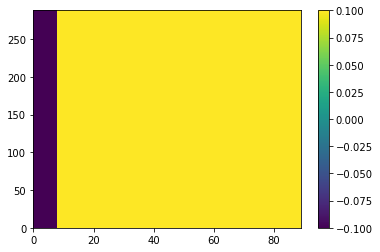

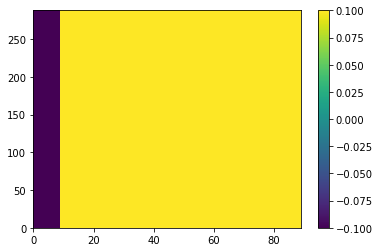

In [23]:
plt.pcolor(dens_minima_dataarray_x)
plt.colorbar()
plt.show()
plt.close()
plt.pcolor(dens_minima_dataarray_y)
plt.colorbar()
plt.show()
plt.close()
